<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Age_prediction_using_resnet_50_on_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import tensorflow as tf
from tensorflow.keras import Sequential,Model,models
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Using TensorFlow backend.


Dataset Link:-http://aicip.eecs.utk.edu/wiki/UTKFace

<img src='https://i.stack.imgur.com/gI4zT.png'>

In [0]:
folder_path = '/content/drive/My Drive/age_prediction_from_image_dataset/images'
img_width=224
img_height=224

In [0]:
str="1_0_0_20161219140623097.jpg"
str.split("_",1)[0]

'1'

In [0]:
import os
images = []
target=[]
for img_name in os.listdir(folder_path):
    img = os.path.join(folder_path, img_name)
    img = image.load_img(img, target_size=(img_width,img_height))
    img = image.img_to_array(img)
    img=img/255.0
    print(img_name, "  ",img_name.split("_",1)[0])
    images.append(img)
    target.append(img_name.split("_",1)[0])

#data=pd.DataFrame(images,columns=['images','target'])
images=np.array(images,dtype=np.float)
target=np.array(target,dtype=np.int)


23_0_0_20170116221005536.jpg    23
23_0_0_20170116221006990.jpg    23
23_0_0_20170116221012037.jpg    23
23_0_0_20170116221018206.jpg    23
23_0_0_20170116221708213.jpg    23
23_0_0_20170116221710870.jpg    23
23_0_0_20170116221722978.jpg    23
23_0_0_20170117134919191.jpg    23
23_0_0_20170117144111812.jpg    23
23_0_0_20170117144116074.jpg    23
23_0_0_20170117144406947.jpg    23
23_0_0_20170117144642723.jpg    23
23_0_0_20170117144439657.jpg    23
23_0_0_20170117144526121.jpg    23
23_0_0_20170117144517953.jpg    23
23_0_0_20170117144550331.jpg    23
23_0_0_20170117144545593.jpg    23
23_0_0_20170117144552915.jpg    23
23_0_0_20170117144555155.jpg    23
23_0_0_20170117144618155.jpg    23
23_0_0_20170117144620972.jpg    23
23_1_1_20170113010455151.jpg    23
23_0_0_20170117144622811.jpg    23
24_0_0_20170102233329675.jpg    24
23_1_2_20170116173039449.jpg    23
24_0_0_20170104004125063.jpg    24
24_0_0_20170104002326444.jpg    24
24_0_0_20170104165239658.jpg    24
24_0_0_2017010423010

In [0]:
#data['images'][0].shape
target[1000]

24

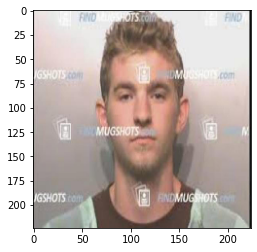

In [0]:
plt.imshow(images[0])

In [0]:
'''import os
image_names=[]
score=[]
for img in os.listdir(folder_path):
    image_names.append([img,img.split("_",1)[0]])

train_label_df=pd.DataFrame(image_names,columns=['image_names','class'])
train_label_df.head()
'''

'import os\nimage_names=[]\nscore=[]\nfor img in os.listdir(folder_path):\n    image_names.append([img,img.split("_",1)[0]])\n\ntrain_label_df=pd.DataFrame(image_names,columns=[\'image_names\',\'class\'])\ntrain_label_df.head()\n'

In [0]:
'''train_datagen = ImageDataGenerator(rescale = 1./255) 

train_generator = train_datagen.flow_from_dataframe(dataframe=train_label_df, directory=folder_path, 
                                              x_col="image_names", y_col="class",
                                              class_mode="raw", target_size=(img_width, img_height),
                                              batch_size=50)
'''

'train_datagen = ImageDataGenerator(rescale = 1./255) \n\ntrain_generator = train_datagen.flow_from_dataframe(dataframe=train_label_df, directory=folder_path, \n                                              x_col="image_names", y_col="class",\n                                              class_mode="raw", target_size=(img_width, img_height),\n                                              batch_size=50)\n'

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(images,target, test_size=0.20, random_state=5)

In [0]:
resnet_arch=ResNet50(input_shape=(img_width,img_height,3),weights="imagenet",include_top=False)

In [0]:
cnt=0
for layers in resnet_arch.layers:
  if cnt<150:
    layers.trainable=False
  cnt+=1
cnt

175

In [0]:
x = resnet_arch.output
# let's add a fully-connected layer
x=Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

# this is the model we will train
model = Model(inputs=resnet_arch.input, outputs=predictions)


In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
model.compile(optimizer="adam",loss="mse",metrics=['mae'])

In [0]:
'''STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
history=model.fit(train_generator, epochs=50, verbose=1,steps_per_epoch=STEP_SIZE_TRAIN)
'''

'STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size\nhistory=model.fit(train_generator, epochs=50, verbose=1,steps_per_epoch=STEP_SIZE_TRAIN)\n'

In [0]:
#model=models.load_model("/content/drive/My Drive/age_prediction_from_image_dataset/mymodel.h5")
history=model.fit(X_train,y_train,batch_size=50,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
33/33 [==============================] - 19s 565ms/step - loss: 15.1937 - mean_absolute_error: 2.8004 - val_loss: 385.1426 - val_mean_absolute_error: 11.0453
Epoch 2/50
33/33 [==============================] - 18s 534ms/step - loss: 11.2169 - mean_absolute_error: 2.4064 - val_loss: 295.9283 - val_mean_absolute_error: 8.3836
Epoch 3/50
33/33 [==============================] - 18s 534ms/step - loss: 11.8910 - mean_absolute_error: 2.3373 - val_loss: 368.1512 - val_mean_absolute_error: 13.2695
Epoch 4/50
33/33 [==============================] - 17s 529ms/step - loss: 8.2697 - mean_absolute_error: 2.0145 - val_loss: 286.0421 - val_mean_absolute_error: 8.1885
Epoch 5/50
33/33 [==============================] - 18s 533ms/step - loss: 9.6557 - mean_absolute_error: 2.2022 - val_loss: 325.7660 - val_mean_absolute_error: 10.3428
Epoch 6/50
33/33 [==============================] - 18s 533ms/step - loss: 13.5738 - mean_absolute_error: 2.5193 - val_loss: 304.3065 - val_mean_absolute_error

In [0]:
model.save('/content/drive/My Drive/age_prediction_from_image_dataset/mymodel.h5')

In [0]:
model=models.load_model("/content/drive/My Drive/age_prediction_from_image_dataset/mymodel.h5")

array([[24.82809]], dtype=float32)

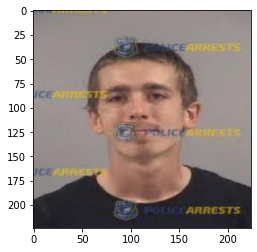

In [6]:
img=image.load_img("/content/drive/My Drive/age_prediction_from_image_dataset/images/23_0_0_20170116221006990.jpg",target_size=(img_width,img_height))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
img = np.expand_dims(img, axis=0)
img_class=model.predict(img)
img_class

In [0]:
model.predict(img)

array([[7.5632696]], dtype=float32)